<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/Copy_of_3_2_sgd_momentum_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

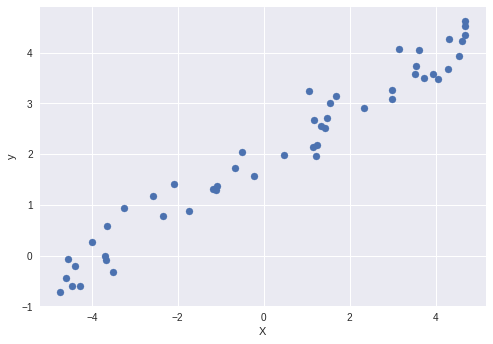

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt


## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

plt.scatter(X[:,0].numpy(), y.numpy().reshape(1,M)[0]);
plt.xlabel("X");
plt.ylabel("y");

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    # YOUR CODE HERE
    
    return X.mm(theta)
  
    
    # raise NotImplementedError()

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    
    M = X.shape[0]
    
    grad = (1/M) * X.t().mm(hypothesis(theta, X) - y)
    
    # raise NotImplementedError()
    
    return grad

## cost_func computes the cost function J
def cost_func(theta, X, y): 
    """
    This func should accept a matrix where each row is a value of theta_0 and theta_1
    
    It should return a list of losses for such rows
    
    cost_func(this_theta,X,y)[0] <- only one loss value comes as we are computing loss for only one theta
    
    J_grid = cost_func(theta_grid.t(), X, y) : 100 loss values for each pair of theta value from theta_grid()
    
    This will help us plot the fig in RHS (for 100 vals of theta_1 what was the loss)
    
    """

    M = X.shape[0]
    
    # print (theta)
    
    # print(theta.shape)
    
    loss_values = []
    number_of_thetas = theta.shape[1]
    
    # for each theta pair compute the loss
    
    for i in range(number_of_thetas):
      theta_value = theta[:,i].reshape(2,1)      
     
      h_theta = hypothesis(theta_value, X)
      
      loss = (1/(2*M)) * ((h_theta-y).t().mm(h_theta-y))
      loss = loss.item()
      loss_values.append(loss)
    
    
    
    
    return loss_values

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

[tensor([[0.5480],
        [1.9151]]), tensor([[0.5658],
        [1.9184]]), tensor([[0.5851],
        [1.9233]]), tensor([[0.6092],
        [1.9298]]), tensor([[0.6256],
        [1.9346]])]
Theta reset tensor([[-1.],
        [-1.]])
[tensor([[0.5358],
        [1.9271]]), tensor([[0.5480],
        [1.9300]]), tensor([[0.5838],
        [1.9514]]), tensor([[0.6450],
        [1.9708]]), tensor([[0.5244],
        [1.9450]])]
Theta reset tensor([[-1.],
        [-1.]])
[tensor([[0.5055],
        [1.9185]]), tensor([[0.5140],
        [1.9249]]), tensor([[0.5232],
        [1.9335]]), tensor([[0.5352],
        [1.9449]]), tensor([[0.5478],
        [1.9566]])]


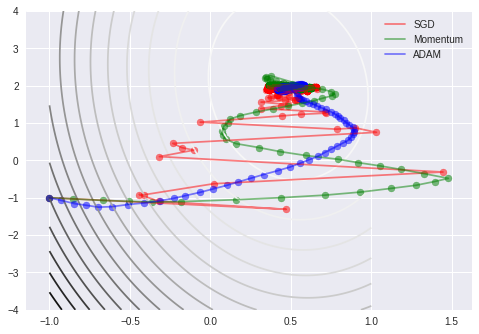

In [99]:
## The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(count, X, y):
    # YOUR CODE HERE
    raise NotImplementedError()

## The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(count, X, y):
    # YOUR CODE HERE
    raise NotImplementedError()

## The weight updated computed using SGD
def weigthupdate_sgd(count, X, y):
    # YOUR CODE HERE
    raise NotImplementedError()

N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.07

theta_0 = torch.Tensor([[2],[4]]) #initialise


optimization_methods = ['SGD', 'Momentum', 'ADAM']

plot_colors = ['red', 'green', 'blue']

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.

# YOUR CODE HERE



theta_0 = torch.Tensor([[-1.0], [-1.0]]) #initialise 

theta = torch.Tensor(2,N,M)

# MOMENTUM -------------------------------------------

this_theta = theta_0

thetas_for_each_iteration_momentum = []


# initialize V_theta to 0

V_theta = torch.Tensor([[0.0], [0.0]])

for j in range(N):
  
  
  # for each iteration
  
  
  for index in range(X.shape[0]):
    
    # for each data pt
    x_data = X[index].reshape(1,2)
    y_data = y[index].reshape(1,1)
    
    # compute grad for this data pt
    
    grad = grad_cost_func(this_theta, x_data, y_data)
    if j%20 == 0 or j==0:
      thetas_for_each_iteration_momentum.append(this_theta)
    
    
    V_theta = beta_1*V_theta + (1-beta_1)*grad
    
    this_theta = this_theta - alpha*V_theta
    
   
    
print(thetas_for_each_iteration_momentum[len(thetas_for_each_iteration_momentum)-5:])

# END MOMENTUM -------------------------------------------


# SGD -------------------------------------------

this_theta = theta_0
print("Theta reset", this_theta)
thetas_for_each_iteration_sgd = []

for j in range(N):
  # for each iteration
  
  for index in range(X.shape[0]):
    
    # for each data pt
    x_data = X[index].reshape(1,2)
    y_data = y[index].reshape(1,1)
    
    # compute grad for this data pt
    
    grad = grad_cost_func(this_theta, x_data, y_data)
    if j%20 == 0 or j==0:
      thetas_for_each_iteration_sgd.append(this_theta)
    this_theta = this_theta - alpha*grad
    
   
    
print(thetas_for_each_iteration_sgd[len(thetas_for_each_iteration_sgd)-5:])


# END SGD -------------------------------------------

# ADAM -------------------------------------------

this_theta = theta_0
print("Theta reset", this_theta)
thetas_for_each_iteration_adam = []


# initiallize params

V_theta = torch.Tensor([[0.0], [0.0]])
S_theta = torch.Tensor([[0.0], [0.0]])
epsilon = 10**-8

for t in range(1, N):
  # for each iteration
  
  for index in range(X.shape[0]):
    
    # for each data pt
    
    x_data = X[index].reshape(1,2)
    y_data = y[index].reshape(1,1)
    
    # compute grad for this data pt
    
    grad = grad_cost_func(this_theta, x_data, y_data)
    
    
    V_theta = beta_1*V_theta + (1-beta_1)*grad
    S_theta = beta_2*S_theta + (1-beta_2)*grad*grad
    
    
    
    V_theta_corrected = V_theta/(1-beta_1**t)
    S_theta_correcetd = S_theta/(1-beta_2**t)
    
    
    grad_update = V_theta_corrected/(torch.sqrt(S_theta_correcetd) + epsilon)
    
    
        
    if t%20 == 0 or t==1:
      thetas_for_each_iteration_adam.append(this_theta)
    this_theta = this_theta - alpha*grad_update
    
   
    
print(thetas_for_each_iteration_adam[len(thetas_for_each_iteration_adam)-5:])






# plot contour

theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
# theta = torch.Tensor(len(theta_0_vals),2)
    
J = np.zeros((100,100))

for a,theta_0_value in enumerate(theta_0_vals):
  for b, theta_1_value in enumerate(theta_1_vals):
    theta_pair = torch.tensor([[theta_0_value], [theta_1_value]])
    # print(theta_pair, cost_func(theta_pair, X, y)[0])
    J[a,b] = cost_func(theta_pair, X, y)[0]
    
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
# contours = plt.contour(xc, yc, J, 20)

# ---------------------------------------------------- contour end


# Plot the weight updates for each optimization method
    

thetas_for_each_iteration_0_momentum = []
thetas_for_each_iteration_1_momentum = []

thetas_for_each_iteration_0_sgd = []
thetas_for_each_iteration_1_sgd = []

thetas_for_each_iteration_0_adam = []
thetas_for_each_iteration_1_adam = []

for theta_value in thetas_for_each_iteration_momentum:
  thetas_for_each_iteration_0_momentum.append(theta_value[0,:].item())
  thetas_for_each_iteration_1_momentum.append(theta_value[1,:].item())
  
for theta_value in thetas_for_each_iteration_sgd:
  thetas_for_each_iteration_0_sgd.append(theta_value[0,:].item())
  thetas_for_each_iteration_1_sgd.append(theta_value[1,:].item())
  
  
for theta_value in thetas_for_each_iteration_adam:
  thetas_for_each_iteration_0_adam.append(theta_value[0,:].item())
  thetas_for_each_iteration_1_adam.append(theta_value[1,:].item())
  
  
"""
plt.scatter(thetas_for_each_iteration_0_momentum, thetas_for_each_iteration_1_momentum, color='red')
plt.plot(thetas_for_each_iteration_0_momentum, thetas_for_each_iteration_1_momentum, color='red')

plt.scatter(thetas_for_each_iteration_0_sgd, thetas_for_each_iteration_1_sgd, color='blue')
plt.plot(thetas_for_each_iteration_0_sgd, thetas_for_each_iteration_1_sgd, color='blue')

plt.scatter(thetas_for_each_iteration_0_adam, thetas_for_each_iteration_1_adam, color='green')
plt.plot(thetas_for_each_iteration_0_adam, thetas_for_each_iteration_1_adam, color='green')


"""

fig, ax = plt.subplots()
contours = ax.contour(xc, yc, J, 20)

for index in range(len(optimization_methods)):
  if index == 0:
    
    # SGD
    ax.scatter(thetas_for_each_iteration_0_sgd, thetas_for_each_iteration_1_sgd, color=plot_colors[index], alpha=0.5)
    ax.plot(thetas_for_each_iteration_0_sgd, thetas_for_each_iteration_1_sgd, color=plot_colors[index], label = optimization_methods[index], alpha=0.5)

    
  elif index == 1:
    
    # Momentum
    
    ax.scatter(thetas_for_each_iteration_0_momentum, thetas_for_each_iteration_1_momentum, color=plot_colors[index], alpha=0.5)
    ax.plot(thetas_for_each_iteration_0_momentum, thetas_for_each_iteration_1_momentum, color=plot_colors[index], label = optimization_methods[index], alpha=0.5)
    
  elif index == 2:
    
    # ADAM
    ax.scatter(thetas_for_each_iteration_0_adam, thetas_for_each_iteration_1_adam, color=plot_colors[index], alpha=0.5)
    ax.plot(thetas_for_each_iteration_0_adam, thetas_for_each_iteration_1_adam, color=plot_colors[index], label = optimization_methods[index], alpha=0.5)
    
ax.legend()
plt.show()  

    
    
  
  






# Compute the value of the cost function, J, over all the thetas in order to plot the contour below.

# Now plot the output of SGD, momentum and Adam all on the same plot for comparison



### Param values:

- Chose N = 200

- alpha = 0.07

- plot for every 10th j

- we can see SGD fluctuates

- SGD with momentum takes a more directed route (when beta = 0.99 it is almost a st line to the minima)
